# Projet : Préparation et Analyse des données de l'utilisateur WeRateDogs

## Introduction
Le but de ce projet est de tester les connaissances et compétences en matière de préparation et d'analyse de données.
L’ensemble de données que nous allons traiter, (analyser et visualiser) est l’archive de tweets de l’utilisateur de Twitter @dog_rates, également connu sous le nom de WeRateDogs. WeRateDogs est un compte Twitter qui évalue les chiens des gens avec un commentaire humoristique sur le chien. Ces notes ont presque toujours un dénominateur de 10. WeRateDogs compte plus de 4 millions d’abonnés et a reçu une couverture médiatique internationale.

Nous avons en notre possession l'archive twitter de WeRateDogs qui contient des données de base (ID de tweet, horodatage, texte, etc.) pour l’ensemble de plus de 5 000 tweets.

## Collecte de données
Dans les deux cellules ci-dessous, nous rassemblons tous les trois ensembles de données pour ce projet et les chargeons dans notre espace de travail. 
Il convient de signaler que les méthodes requises pour recueillir chaque ensemble de données sont différentes.
>
>Avant toute manipulation, nous devons d'abord préparer notre espace de travail :
>
><ul>
    <li>Importer les librairies et modules nécessaires
    <li>Configurer certaines valeurs par défaut</li>
<ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import configparser  # Library to hide cridentials
import json
from timeit import default_timer as timer
import ast
import re

In [2]:
# Include a 'magic word' for visualizing plotted inline with the notebook
%matplotlib inline

In [3]:
# Setup pandas configurations
pd.set_option('display.max_columns', 21) # Augmenter la limite de colonnes à afficher par défaut.
pd.set_option('display.max_rows', 20) # Augmenter la limite de lignes à afficher par défaut.
pd.options.mode.chained_assignment = None  # Disable warnings 

1. Téléchargez directement les données des archives Twitter de WeRateDogs (twitter_archive_enhanced.csv).

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Les prédictions de l’image tweet : Téléchargement programmatique
<br>Grâce à la library <b>requests</b>, nous allons télécharger et enregistrer le fichier <b>image_predictions.tsv</b> contenant certaines information telle que les urls des photos des chiens.

In [5]:
'''
# Get the image_predictions.tsv from url
#folder_name = 'image_predictions'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
'''

"\n# Get the image_predictions.tsv from url\n#folder_name = 'image_predictions'\nurl = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'\nresponse = requests.get(url)\nwith open(os.path.join(url.split('/')[-1]), mode='wb') as file:\n    file.write(response.content)\n"

In [6]:
# Load data from image-predictions.tsv
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Données supplémentaires : Utilisation de l'API Twitter
<br>Maintenant nous devons récupérer les données supplémentaires : le nombre de retweets de chaque tweet et le nombre de favoris (« j’aime ») en utilisant l’API Twitter. Pour y arriver, nous allons procéder de la manière suivante :
<ul>
    <li>Configurer twitter API</li>
    <li>Récupérer la liste de tous les identifiants des tweets(tweet_id) contenus dans <b>df_twitter_archive</b></li>
    <li>Utiliser l'API pour récupérer ces données supplémentaires </li>
    <li>Si un téléchargement réussi, stocker ces données sous forme de dictionnaire dans la variable <b>tweets_list</b></li>
    <li>Si un téléchargement échoue, enregistrer son tweet_id dans <b>error_tweets_list</b></li>
</ul>Données supplémentaires : Utilisation de l'API Twitter
Maintenant nous devons récupérer les données supplémentaires : le nombre de retweets de chaque tweet et le nombre de favoris (« j’aime ») en utilisant l’API Twitter. Pour y arriver, nous allons procéder de la manière suivante :
<ul>
    <li>Configurer twitter API</li>
    <li>Récupérer la liste de tous les identifiants des tweets(tweet_id) contenus dans <b>df_twitter_archive</b></li>
    <li>Utiliser l'API pour récupérer ces données supplémentaires </li>
    <li>Si un téléchargement réussi, stocker ces données sous forme de dictionnaire dans la variable <b>tweets_list</b></li>
    <li>Si un téléchargement échoue, enregistrer son tweet_id dans <b>error_tweets_list</b></li>
</ul>

In [7]:
# Twitter API configuration
config = configparser.RawConfigParser()
config.read('config.ini')

api_key = config['TWITTER']['api_key']
api_key_secret = config['TWITTER']['api_key_secret']

access_token = config['TWITTER']['access_token']
access_token_secret = config['TWITTER']['access_token_secret']

bearer_token = config['TWITTER']['bearer_token']

In [8]:
# Twitter API Authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

# Create the API instance
api = tweepy.API(auth)

In [9]:
# Get the list of all tweet_id of df_twitter_archive
tweet_id_list = list(twitter_archive['tweet_id'])

# Display the first some 10 tweet_id of the list to check if all right
print((tweet_id_list)[:10])

[892420643555336193, 892177421306343426, 891815181378084864, 891689557279858688, 891327558926688256, 891087950875897856, 890971913173991426, 890729181411237888, 890609185150312448, 890240255349198849]


In [10]:
'''
# Get additional data from twitter API

tweets_list = []
error_tweets_list = []
tweets_count = 0

start = timer()
for tweet_id in tweet_id_list:
    tweet = {}
    tweets_count += 1
    print('{0} : {1} fecthing data...'.format(tweets_count, tweet_id))

    try:
        
        tweet_data = api.get_status(tweet_id, tweet_mode="extended")
        retweet_count = tweet_data._json['retweet_count']
        favorite_count = tweet_data._json['favorite_count']
        
        tweet['tweet_id'] = str(tweet_id)
        tweet['retweet_count'] = retweet_count
        tweet['favorite_count'] = favorite_count
        tweets_list.append(tweet)
        
        print(tweet)
        print('Done')
    
    except:
        error_tweets_list.append(tweet_id)
        print('Failed')
        pass
    
    print('_______________________________________')

end = timer()
duration = end - start

# Convert the runtime in minutes-seconds
sec = duration % (24 * 3600)
hour = sec // 3600
sec %= 3600
min = sec // 60
sec %= 60

# Performance Report
print("Duration : %02d:%02d:%02d" % (hour, min, sec))
print('Total of successes : ', len(tweets_list))
print('Total of failures :', len(error_tweets_list))
print(tweets_list)
print(error_tweets_list)
'''

'\n# Get additional data from twitter API\n\ntweets_list = []\nerror_tweets_list = []\ntweets_count = 0\n\nstart = timer()\nfor tweet_id in tweet_id_list:\n    tweet = {}\n    tweets_count += 1\n    print(\'{0} : {1} fecthing data...\'.format(tweets_count, tweet_id))\n\n    try:\n        \n        tweet_data = api.get_status(tweet_id, tweet_mode="extended")\n        retweet_count = tweet_data._json[\'retweet_count\']\n        favorite_count = tweet_data._json[\'favorite_count\']\n        \n        tweet[\'tweet_id\'] = str(tweet_id)\n        tweet[\'retweet_count\'] = retweet_count\n        tweet[\'favorite_count\'] = favorite_count\n        tweets_list.append(tweet)\n        \n        print(tweet)\n        print(\'Done\')\n    \n    except:\n        error_tweets_list.append(tweet_id)\n        print(\'Failed\')\n        pass\n    \n    print(\'_______________________________________\')\n\nend = timer()\nduration = end - start\n\n# Convert the runtime in minutes-seconds\nsec = duration 

In [11]:
'''
# write additional data into tweet_json.txt
file_name = 'tweet_json.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    for tweet in tweets_list:
        json.dump(tweet, file) 
        file.write("\n")
'''

'\n# write additional data into tweet_json.txt\nfile_name = \'tweet_json.txt\'\nwith open(file_name, \'w\', encoding=\'utf-8\') as file:\n    for tweet in tweets_list:\n        json.dump(tweet, file) \n        file.write("\n")\n'

In [12]:
# Load data from the tweet_json.txt file
tweet_json = pd.DataFrame(pd.read_csv('tweet_json.txt',sep='|',header=None).iloc[:,0].apply(ast.literal_eval).tolist())
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6961,33648
1,892177421306343426,5265,29193
2,891815181378084864,3463,21954
3,891689557279858688,7182,36738
4,891327558926688256,7707,35137
...,...,...,...
2320,666049248165822465,36,88
2321,666044226329800704,114,245
2322,666033412701032449,36,100
2323,666029285002620928,39,112


## Évaluation des données
Dans cette section, nous allons détecter et documenter des problèmes de qualité et d'ordre, en utilisant l'évaluation visuelle et l'évaluation programmatique.

**Remarques :**

* Ne considérer que les évaluations originales (pas de retweets) qui ont des images. Tous ne sont pas des évaluations de chiens, certains sont des retweets.
* L'évaluation et le nettoyage complets de l'ensemble des données prendraient beaucoup de temps et ne seraient pas nécessaires pour mettre en pratique et démontrer les compétences en matière de traitement des données. Par conséquent, les exigences de ce projet consistent uniquement à évaluer et à nettoyer au moins 8 problèmes de qualité et au moins 2 problèmes d'ordre dans cet ensemble de données.
* Le fait que les numérateurs de notation soient plus grands que les dénominateurs n'a pas besoin d'être nettoyé. Ce [système d'évaluation unique](http://knowyourmeme.com/memes/theyre-good-dogs-brent) est en grande partie à l'origine de la popularité de WeRateDogs.
* Les données(tweets) rassemblées ne vont au-delà du 1er août 2017.
* Nous avons utilisé une application externe (Google Sheets et Docs) pour réaliser notre évaluation visuelle :
<br>[twitter-archive-enhanced.csv](https://docs.google.com/spreadsheets/d/1g_fgpyh7XWp60WJJ8Q0V3YUVRd5zJUtgPv059iklIjA/edit?usp=sharing)
<br>[image-predictions.tsv](https://docs.google.com/spreadsheets/d/126HEv4Zntm_FG7P70lvdzGrqPnzUmvlKrT7nwdH7xDY/edit?usp=sharing)
<br>[tweet_json.txt](https://docs.google.com/document/d/1rux466GwEFrY-HJsxrURwyXBsi5aIITd1Dn8Z7mx3IA/edit?usp=sharing)

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   retweet_count   2325 non-null   int64 
 2   favorite_count  2325 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [16]:
# Get the number of duplicated rows of the passed dataframe
def getDuplicatedRows(dataframe):
    return ("Total duplicated rows = {0}".format(len(dataframe[dataframe.duplicated(subset=['tweet_id'])])))

In [17]:
# Verify duplicated rows
print('twitter_archive :', getDuplicatedRows(twitter_archive))
print('image_predictions :', getDuplicatedRows(image_predictions))
print('tweet_json :', getDuplicatedRows(tweet_json))

twitter_archive : Total duplicated rows = 0
image_predictions : Total duplicated rows = 0
tweet_json : Total duplicated rows = 0


In [18]:
# Get the unique values of each column in a given list of columns for a dataframe
def getUniqueValues(dataframe, columns_list):
    list_of_colums_unique_values= []
    for col in columns_list:
        column_unique_values = {}
        column_list_of_unique_values = list(dataframe[col].unique())
        column_unique_values[col] = column_list_of_unique_values
        list_of_colums_unique_values.append(column_unique_values)
    return list_of_colums_unique_values

In [19]:
# Get the unique values of the columns ['rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo'] in the twitter_archive dataframe
getUniqueValues(twitter_archive, ['rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo'])

[{'rating_numerator': [13,
   12,
   14,
   5,
   17,
   11,
   10,
   420,
   666,
   6,
   15,
   182,
   960,
   0,
   75,
   7,
   84,
   9,
   24,
   8,
   1,
   27,
   3,
   4,
   165,
   1776,
   204,
   50,
   99,
   80,
   45,
   60,
   44,
   143,
   121,
   20,
   26,
   2,
   144,
   88]},
 {'rating_denominator': [10,
   0,
   15,
   70,
   7,
   11,
   150,
   170,
   20,
   50,
   90,
   80,
   40,
   130,
   110,
   16,
   120,
   2]},
 {'doggo': ['None', 'doggo']},
 {'floofer': ['None', 'floofer']},
 {'pupper': ['None', 'pupper']},
 {'puppo': ['None', 'puppo']}]

In [20]:
# Get the unique values of the columns ['img_num', 'p1_dog', 'p2_dog', 'p3_dog'] in the image_predictions dataframe
getUniqueValues(image_predictions, ['img_num', 'p1_dog', 'p2_dog', 'p3_dog'])

[{'img_num': [1, 4, 2, 3]},
 {'p1_dog': [True, False]},
 {'p2_dog': [True, False]},
 {'p3_dog': [True, False]}]

In [21]:
# Get the number of times a value is included in a given columns of a dataframe
def getValueCounts(dataframe, columns):
    list_of_col = []
    for col in columns:
        col_value_counts = {}
        value_counts = dataframe[col].value_counts()
        col_value_counts[col] = value_counts
        list_of_col.append(col_value_counts)
    return list_of_col

In [22]:
getValueCounts(twitter_archive, ['rating_numerator', 'rating_denominator'])

[{'rating_numerator': 12     558
  11     464
  10     461
  13     351
  9      158
        ... 
  27       1
  45       1
  99       1
  121      1
  204      1
  Name: rating_numerator, Length: 40, dtype: int64},
 {'rating_denominator': 10     2333
  11        3
  50        3
  80        2
  20        2
  2         1
  16        1
  40        1
  70        1
  15        1
  90        1
  110       1
  120       1
  130       1
  150       1
  170       1
  7         1
  0         1
  Name: rating_denominator, dtype: int64}]

In [23]:
getValueCounts(image_predictions, ['img_num', 'p1_dog', 'p2_dog', 'p3_dog'])

[{'img_num': 1    1780
  2     198
  3      66
  4      31
  Name: img_num, dtype: int64},
 {'p1_dog': True     1532
  False     543
  Name: p1_dog, dtype: int64},
 {'p2_dog': True     1553
  False     522
  Name: p2_dog, dtype: int64},
 {'p3_dog': True     1499
  False     576
  Name: p3_dog, dtype: int64}]

## Problèmes de qualité
1. La colonne `tweet_id` de la table `twitter-archive-enhanced` n'est pas de type object. Nous voyons par exemple à la ligne 978(Voir Google sheets) un tweet_id avec la valeur **7,50027E+17**

2. Certains tweets ne sont pas côtés sur 10. Ce qui fait que leur `ratting_numerator` et leur `ratting_denominator` soient largement au-delà de la plage considérable. Exemple à la ligne 435 dans notre google sheets(tweet_id=820690176645140481) qui a une note de 84/70.

3. Certains tweets ont un `ratting_numerator` bien au-délà de la plage acceptable. Exemple à la ligne 981(tweet_id=749981277374128128) a un `ratting_numerator` de **1776**. 

4. Certaines cellules dans la colonne `text` contiennent plus d'une note, et souvent la première qui est prise, est une note erronée. Exemple ligne 1070(tweet _id = 740373189193256964) contient deux notes, la première = 9/11 qui est erronée, et la deuxième = 14/10 qui est la bonne.

5. Certaines notes contiennent une partie décimale, ce qui fait en sorte que lorsqu'on les extrait, seule la partie décimale est prise en compte pour le numérateur. Par exemple, la ligne 697(tweet_id = 786709082849828864) a une note de 9.75/10 dans la colonne `text`, tandis que la colonne `ratting_numerator` récupère juste la partie décimale qui est 75.

6. La colonne `timestamp` dans `twitter-archive-enhanced` est de type `object` à la place du type `datetime` ;

7. La colonne `tweet_id` dans la table `image_predictions` est de type `int64` à la place du type `object`.

8. Données manquantes : La table `twitter-archive-enhanced` a **2356 lignes**,  `image_predictions` a **2075 lignes**, et `tweet_json` a **2325 lignes**

### Problèmes d'ordre
1. Dans la table `twitter-archive-enhanced`, Les valeurs constituent les noms des colonnes(`doggo`, `floofer`, `pupper`, `puppo`). Ce sont des valeurs possibles pour la colonne Phase de chien.

2. La table `twitter-archive-enhanced` manque les colonnes `retweet_count` et `favorite_count` qui sont dans la table `tweet_json`.

3. La table `twitter-archive-enhanced` contient les informations détaillées des tweets, et des chiens.

4. Les colonnes `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` dans la table `twitter-archive-enhanced` ne concernent pas directement les tweets originaux.

## Nettoyage des données
Dans cette section, nous nettoyons tous les problèmes que nous avons documentés pendant l'évaluation.

**Remarques :** Faites une copie des données originales avant le nettoyage. Le nettoyage comprend la fusion des données individuelles selon les règles de [données ordonnées](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). Le résultat doit être un DataFrame global de haute qualité et bien rangé, ou bien plusieurs DataFrames, le cas échéant.


In [24]:
# Make copies of original pieces of data before any manipulation
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_json_copy = tweet_json.copy()

>Étant donné que nos données contiennent les tweets, les retweets, nous allons d'abord les épurer en éliminant toutes les lignes qui ne sont pas de tweets.Dans le cadre de cette étude, seuls les tweets nous intéressent.
>
>Pour s'y faire, nous allons supprimer toutes les lignes qui contiennent des valeurs pour les colonnes `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, car elles ne représentent pas de tweets. Ce sont soit des **retweets**(`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`), soit des **réponses** aux tweets(`in_reply_to_status_id`, `in_reply_to_user_id`)

In [25]:
# Check if there are values for the reply or retweets columns
getUniqueValues(twitter_archive_copy, ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

[{'in_reply_to_status_id': [nan,
   8.862663570751283e+17,
   8.816070373140521e+17,
   8.795538273341727e+17,
   8.707262027424932e+17,
   8.634256455687741e+17,
   6.671521640794235e+17,
   8.571566780553421e+17,
   8.55818117272019e+17,
   8.562860041095537e+17,
   8.558615844633518e+17,
   8.558585356070011e+17,
   8.503288187788206e+17,
   8.482121117298401e+17,
   8.476061755961385e+17,
   7.590995235327795e+17,
   8.406983002988626e+17,
   8.381454986911949e+17,
   8.380855393624023e+17,
   8.35245984028504e+17,
   8.320875475599974e+17,
   8.319030442248356e+17,
   8.265983652700078e+17,
   8.233263893362442e+17,
   8.21152592717697e+17,
   8.13127251579564e+17,
   8.116272330434806e+17,
   7.33109485275861e+17,
   8.018543306724475e+17,
   8.008579544172626e+17,
   7.97123751162839e+17,
   7.727430194476073e+17,
   7.667118193648886e+17,
   7.638651745539645e+17,
   7.501804988324045e+17,
   7.476486538174136e+17,
   7.468859193875743e+17,
   6.914168664520827e+17,
   7.384119

In [26]:
filter_value = ['NaN']

In [27]:
twitter_archive_copy = (twitter_archive_copy[twitter_archive_copy['in_reply_to_status_id'].isin(filter_value)])
twitter_archive_copy = (twitter_archive_copy[twitter_archive_copy['in_reply_to_user_id'].isin(filter_value)])
twitter_archive_copy = (twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isin(filter_value)])
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [28]:
# Check if there are values for the reply or retweets columns
getValueCounts(twitter_archive_copy, ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

[{'in_reply_to_status_id': Series([], Name: in_reply_to_status_id, dtype: int64)},
 {'in_reply_to_user_id': Series([], Name: in_reply_to_user_id, dtype: int64)},
 {'retweeted_status_id': Series([], Name: retweeted_status_id, dtype: int64)},
 {'retweeted_status_user_id': Series([], Name: retweeted_status_user_id, dtype: int64)},
 {'retweeted_status_timestamp': Series([], Name: retweeted_status_timestamp, dtype: int64)}]

In [29]:
# Check again if there are values for the reply or retweets columns
getUniqueValues(twitter_archive_copy, ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

[{'in_reply_to_status_id': [nan]},
 {'in_reply_to_user_id': [nan]},
 {'retweeted_status_id': [nan]},
 {'retweeted_status_user_id': [nan]},
 {'retweeted_status_timestamp': [nan]}]

### Problème #1 :
<font color='red'>La colonne "tweet_id" est de type int64 à la place du type object.</font>

#### Logique :
><ul>
    <li>Convertir le type de donnée de la colonne tweet_id(int64) en un objet(object) grâce à la méthode astype(str)</li>
</ul>

#### Code

In [30]:
twitter_archive_copy.tweet_id = twitter_archive_copy.tweet_id.astype(str)

#### Test

In [31]:
print(twitter_archive_copy.dtypes.tweet_id)

object


### Problème #2 :
<font color='red'>La colonne "tweet_id" dans la table image_predictions est de type int64 à la place du type object.</font>

#### Logique :
><ul>
    <li>Convertir le type de donnée de la colonne tweet_id(int64) en un objet(object) grâce à la méthode astype(str)</li>
</ul>

#### Code

In [32]:
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype(str)

#### Test

In [33]:
print(image_predictions_copy.dtypes.tweet_id)

object


### Problème #3 :
<font color='red'>La colonne "timestamp" dans twitter-archive-enhanced est de type object à la place du type datetime.</font>

#### Logique :
><ul>
    <li>Convertir le type de donnée de la colonne timestamp(object) en une date(datetime) grâce à la méthode to_datetime()</li>
</ul>

#### Code

In [34]:
twitter_archive_copy.timestamp = twitter_archive_copy['timestamp'].astype('datetime64[ns]')

#### Test

In [35]:
print(twitter_archive_copy.dtypes.timestamp)

datetime64[ns]


<font color='blue'>Vue que nous venons de résoudre les problèmes de type des données, nous pouvons entamer les problèmes de d'ordre. Nos dataframes sont maintenant prêts à supporter les opérations de merging qui nécessitent à ce que les colonnes qui servent de clés soient de même type.</font>

### Problème #4 :
<font color='red'>Les colonnes "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" de la table twitter-archive-enhanced ne concernent pas directement les tweets originaux.</font>

#### Logique :
><ul>
    <li>Supprimer les colonnes "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" dans la table twitter-archive-enhanced avec la méthode drop() de pandas</li>
</ul>

#### Code

In [36]:
twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [37]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


### Problème #5 :
<font color='red'>La table twitter-archive-enhanced manque les colonnes retweet_count et favorite_count qui sont dans la table tweet_json.</font>

#### Logique :
><ul>
    <li>Faire une fusion entre les tables twitter_archive_copy et tweet_json_copy qui contient les deux colonnes en question.</li>
    <li>Se baser sur la colonne tweet_id pour réaliser cette fusion entre les deux tables avec la methode merge.</li>
</ul>

#### Code

In [38]:
twitter_archive_copy = twitter_archive_copy.merge(tweet_json_copy[['tweet_id', 'retweet_count', 'favorite_count']], on='tweet_id', how='left')

#### Test

In [39]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
 12  retweet_count       2087 non-null   float64       
 13  favorite_count      2087 non-null   float64     

### Problème #6 :
<font color='red'>Dans la table twitter-archive-enhanced, Les valeurs constituent les noms des colonnes(doggo, floofer, pupper, puppo). Ce sont des valeurs possibles pour la colonne Phase de chien.</font></font>

#### Logique :
><ul>
    <li>Créer un colonne "phase" qui va contenir pour chaque tweeet, la phase du chien en question</li>
    <li>Initialiser la colonne 'phase' à None, car pour plusieurs chiens, on a pas précisé la phase</li>
    <li>Pour chaque valeur(doggo, floofer, pupper, puppo), Récupérer les index des cellules qui la contient avec la méthode .index.tolist()</li>
    <li>Récupérer les index de chaque </li>
    <li>Créer une fonction qui récupère les index stockés pour chaque phase et change pour chaque index sa valeur dans la colonne "phase" qui sera égale à cette valeur</li>
    <li>Supprimer enfin toutes les quatre colonnes qui représentent les phases(doggo, floofer, pupper, puppo).</li>
</ul>

#### Code

In [40]:
# Create the column 'phase'
twitter_archive_copy['phase'] = None

In [41]:
# Get list of index for each phase
list_of_index_phases = []
index_of_phase = {}
index_of_phase['doggo'] = twitter_archive_copy.doggo[twitter_archive_copy.doggo.str.contains('doggo')].index.tolist()
index_of_phase['floofer'] = twitter_archive_copy.floofer[twitter_archive_copy.floofer.str.contains('floofer')].index.tolist()
index_of_phase['pupper'] = twitter_archive_copy.pupper[twitter_archive_copy.pupper.str.contains('pupper')].index.tolist()
index_of_phase['puppo'] = twitter_archive_copy.puppo[twitter_archive_copy.puppo.str.contains('puppo')].index.tolist()
index_of_phase

{'doggo': [9,
  39,
  86,
  94,
  95,
  104,
  143,
  154,
  161,
  192,
  199,
  237,
  249,
  253,
  260,
  267,
  268,
  269,
  274,
  283,
  284,
  292,
  303,
  304,
  306,
  308,
  332,
  334,
  336,
  343,
  349,
  350,
  358,
  379,
  383,
  388,
  390,
  416,
  446,
  452,
  453,
  465,
  472,
  531,
  536,
  554,
  557,
  560,
  562,
  572,
  598,
  600,
  622,
  643,
  647,
  678,
  682,
  689,
  697,
  710,
  715,
  720,
  737,
  738,
  741,
  748,
  768,
  776,
  780,
  783,
  816,
  825,
  836,
  848,
  860,
  864,
  887,
  897,
  901,
  924,
  939,
  959,
  987],
 'floofer': [42, 161, 450, 593, 775, 809, 875, 894, 1303, 1381],
 'pupper': [28,
  45,
  51,
  72,
  81,
  85,
  93,
  115,
  160,
  177,
  200,
  231,
  235,
  239,
  259,
  275,
  298,
  317,
  329,
  347,
  358,
  371,
  375,
  402,
  413,
  416,
  418,
  434,
  446,
  449,
  460,
  477,
  510,
  536,
  562,
  574,
  585,
  586,
  592,
  595,
  606,
  610,
  617,
  658,
  686,
  689,
  713,
  719,
  743,
  74

In [42]:
# Change the value of each index of a phase name
for phase in ['doggo', 'floofer', 'pupper', 'puppo']:
    for index in index_of_phase[phase]:
        twitter_archive_copy.at[index, 'phase'] = phase

In [43]:
# Drop the column which represente the phase of dog((doggo, floofer, pupper, puppo))
twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [44]:
twitter_archive_copy.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,phase
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,6961.0,33648.0,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5265.0,29193.0,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3463.0,21954.0,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7182.0,36738.0,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7707.0,35137.0,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,2580.0,17703.0,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1644.0,10305.0,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,15664.0,56595.0,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,3599.0,24383.0,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6059.0,27797.0,doggo


In [45]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   retweet_count       2087 non-null   float64       
 9   favorite_count      2087 non-null   float64       
 10  phase               336 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 276.6+ KB


### Problème #7 :
<font color='red'>La table twitter-archive-enhanced contient les informations détaillées et des tweets, et des chiens.</font>

#### Logique
><ul>
    <li>Déplacer les colonnes "name" et "phase" de la table "twitter-archive" à la table "image_predictions" grâce à la methode merge.</li>
    <li>Supprimer les colonnes name et phase dans la table twitter_archive_copy</li>
</ul>

#### Code

In [46]:
image_predictions_copy = image_predictions_copy.merge(twitter_archive_copy[['tweet_id', 'name', 'phase']], on='tweet_id', how='left')

In [47]:
twitter_archive_copy.drop(['name', 'phase'], axis=1, inplace=True)

In [48]:
twitter_archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,6961.0,33648.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,5265.0,29193.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,3463.0,21954.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,7182.0,36738.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,7707.0,35137.0
...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,36.0,88.0
2093,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,114.0,245.0
2094,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,36.0,100.0
2095,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,39.0,112.0


#### Test

In [49]:
image_predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,name,phase
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,a,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,a,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,a,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Franklin,None
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Darla,None
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Archie,None
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tilly,None


In [50]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
 12  name      1971 non-null   object 
 13  phase     303 non-null    object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 200.6+ KB


In [51]:
# Set the order of columns in a given dataframe
def setColumnsOrder(dataframe, ordered_columns_list):
    return dataframe[ordered_columns_list]

In [52]:
# Set the order of columns in the image_predictions dataframe
ordered_columns_list = ['tweet_id', 'name', 'jpg_url', 'img_num', 'phase', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_predictions_copy = setColumnsOrder(image_predictions_copy, ordered_columns_list)
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   name      1971 non-null   object 
 2   jpg_url   2075 non-null   object 
 3   img_num   2075 non-null   int64  
 4   phase     303 non-null    object 
 5   p1        2075 non-null   object 
 6   p1_conf   2075 non-null   float64
 7   p1_dog    2075 non-null   bool   
 8   p2        2075 non-null   object 
 9   p2_conf   2075 non-null   float64
 10  p2_dog    2075 non-null   bool   
 11  p3        2075 non-null   object 
 12  p3_conf   2075 non-null   float64
 13  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 200.6+ KB


### Problème #8 : Ici nous traitons deux problème à la fois car ils sont un peu similaires.
<font color='red'>- Certains tweets ne sont pas côtés sur 10. Ce qui fait que leur ratting_numerator et leur ratting_denominator soient largement au-delà de la plage considérable. Exemple à la ligne 435 dans notre google sheets(tweet_id=820690176645140481) qui a une note de 84/70.</font>

<font color='red'>- Certaines cellules dans la colonne text contiennent plus d'une note, et souvent la première qui est prise, est une note erronée. Exemple ligne 1070(tweet _id = 740373189193256964) contient deux notes, la première = 9/11 qui est erronée, et la deuxième = 14/10 qui est la bonne.</font>

#### Logique :
>Nous allons résoudre ces deux problème au même moment car dans tous les deux cas, le dénominateur pris en compte est différent de 10.
><ul>
    <li>Créer un dataframe qui contient tous les tweets dont la colonne rating_denominator est différent de 10</li>
    <li>A partir de ce nouveau dataframe, extraire à nouveau pour chaque ligne la liste des notes dans la colonne "text"</li>
    <li>Pour les colonnes les listes qui ont plusieurs notes(2 notes d'après un constat visuel), prendre la dernière note qui est la bonne afin d'avoir une seule liste qui contient toutes les vraies notes provenant de la colonne "text"</li>
    <li>Créer une fonction(convertNoteByTen) qui convertit le numérateur de chaque note à partir de l'équation numérateur/dénominateur = vrai_numérateur/10</li>
    <li>Remplacer la valeur de rating_numerator de chaque tweet du nouveau dataframe par la vraie valeur obtenue grâce à la fonction (convertNoteByTen)</li>
    <li>Remplacer la valeur de "rating_denominator" par la valeur 10</li>
    <li>Créer une fonction(deleteRowsWithBadNotes) qui permet de supprimer les lignes qui contiennent de mauvaises valeurs dans un dataframe. Cette fonction reçoit en paramètre:
        <ul><li>le dataframe de départ(Qui contient les bonnes et mauvaises valeurs)</li>
            <li>le dataframe qui contient uniquement les valeurs à supprimer dans le dataframe de départ</li>
            <li>la colonne de comparaison(Column_key)</li></ul>
    </li>
    <li>Supprimer les tweets qui contiennent des valeurs erronées</li>
    <li>Insérer les tweets qui ont des bonnes notes à la place</li>
</ul>

#### Code

In [53]:
denominator_different_to_ten = twitter_archive_copy.loc[(twitter_archive_copy.rating_denominator != 10)]
denominator_different_to_ten.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
339,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,2987.0,11547.0
403,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,1323.0,5035.0
700,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,2022.0,4464.0
853,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,12078.0,32377.0
904,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,1138.0,3533.0


In [54]:
tweets_with_several_notes=[]
for row in denominator_different_to_ten.text:
    tweets_with_several_notes.append(re.findall("([0-9]+/[0-9]+)", row))
print(tweets_with_several_notes)
tweets_with_several = denominator_different_to_ten.query('text.str.extract("([0-9]+/[0-9]+?[0-9]+/[0-9])")')

[['84/70'], ['24/7'], ['165/150'], ['9/11', '14/10'], ['204/170'], ['4/20', '13/10'], ['50/50', '11/10'], ['99/90'], ['80/80'], ['45/50'], ['60/50'], ['44/40'], ['121/110'], ['7/11', '10/10'], ['144/120'], ['88/80'], ['1/2', '9/10']]


In [55]:
data = [s[-1] for s in tweets_with_several_notes]
print(data)

['84/70', '24/7', '165/150', '14/10', '204/170', '13/10', '11/10', '99/90', '80/80', '45/50', '60/50', '44/40', '121/110', '10/10', '144/120', '88/80', '9/10']


In [56]:
def convertNoteByTen(list_of_texts):
    numerators_list = []
    for element in list_of_texts:
        numerator = round(float(element.split('/')[0]))
        denominator = round(float(element.split('/')[1]))
        #numerator, denominator = int(numerator), int(denominator)
        if (denominator != 10):
            numerator = (numerator*10)/denominator
        numerators_list.append(round(numerator))
    return numerators_list

In [57]:
list_of_rattings_numerators = convertNoteByTen(data)
list_of_rattings_numerators

[12, 34, 11, 14, 12, 13, 11, 11, 10, 9, 12, 11, 11, 10, 12, 11, 9]

In [58]:
# Replace the ratting_numerator column of denominator_different_to_ten by the numerators_list

# 1. Find the name of the column by index
index_of_column_to_replace = denominator_different_to_ten.columns[5]
print(index_of_column_to_replace)

# 2. Drop that column
denominator_different_to_ten.drop(index_of_column_to_replace, axis = 1, inplace = True)

# 3. Replace the rating_denominator
denominator_different_to_ten.rating_denominator = 10

# 4. Put whatever series you want in its place
denominator_different_to_ten['rating_numerator'] = list_of_rattings_numerators

# 5. Verify the result
print(denominator_different_to_ten.info())
denominator_different_to_ten

rating_numerator
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 339 to 2076
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            17 non-null     object        
 1   timestamp           17 non-null     datetime64[ns]
 2   source              17 non-null     object        
 3   text                17 non-null     object        
 4   expanded_urls       17 non-null     object        
 5   rating_denominator  17 non-null     int64         
 6   retweet_count       17 non-null     float64       
 7   favorite_count      17 non-null     float64       
 8   rating_numerator    17 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.3+ KB
None


,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,retweet_count,favorite_count,rating_numerator
339,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,10,2987.0,11547.0,12
403,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",10,1323.0,5035.0,34
700,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,10,2022.0,4464.0,11
853,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,10,12078.0,32377.0,14
904,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,10,1138.0,3533.0,12
948,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,10,1427.0,3752.0,13
985,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,10,189.0,2185.0,11
1011,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,10,659.0,2605.0,11
1036,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10,512.0,2132.0,10
1056,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,10,588.0,2261.0,9


In [59]:
# Set the order of the denominator_different_to_ten DataFrame
denominator_different_to_ten = setColumnsOrder(denominator_different_to_ten, list(twitter_archive_copy))
denominator_different_to_ten.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
339,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12,10,2987.0,11547.0
403,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",34,10,1323.0,5035.0
700,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11,10,2022.0,4464.0
853,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,12078.0,32377.0
904,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12,10,1138.0,3533.0


In [60]:
length_before_deleting_rows = len(twitter_archive_copy)
length_before_deleting_rows

2097

In [61]:
# Delete rows witch contain bad notes 
def deleteRowsWithBadNotes(df_to_modify, df_with_good_notes, column_key):
    for row in df_with_good_notes[column_key]:
        df_to_modify.drop(df_to_modify[df_to_modify[column_key] == row].index, inplace = True)
    return df_to_modify

In [62]:
# Drop rows witch contain bad notes(rating_denominator != 10)
twitter_archive_copy = deleteRowsWithBadNotes(twitter_archive_copy, denominator_different_to_ten, 'tweet_id')
twitter_archive_copy.shape

(2080, 9)

In [63]:
length_after_deleting_rows = len(twitter_archive_copy)
length_rows_to_drop = len(denominator_different_to_ten)
print('length after deleting rows : {0}\nlength of rows to drop : {1}\nLength of rows before deleting = {0} + {1} = {2}'.format(length_after_deleting_rows, length_rows_to_drop, length_before_deleting_rows))

length after deleting rows : 2080
length of rows to drop : 17
Length of rows before deleting = 2080 + 17 = 2097


In [64]:
# Add rows witch contain good notes (Concate twitter_archive_copy with denominator_different_to_ten  )
dataframes = [twitter_archive_copy, denominator_different_to_ten]
twitter_archive_copy = pd.concat(dataframes)
print(twitter_archive_copy.shape)

(2097, 9)


#### Test

In [65]:
# Check if there is any row witch rating_denominator != 10
denominator_different_to_ten = twitter_archive_copy.loc[(twitter_archive_copy.rating_denominator != 10)]
print(denominator_different_to_ten.shape)
denominator_different_to_ten.head()


(0, 9)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count


### Problème #9 :
<font color='red'>Certaines notes contiennent une partie décimale, ce qui fait en sorte que lorsqu'on les extrait, seule la partie décimale est prise en compte pour le numérateur. Par exemple, la ligne 697(tweet_id = 786709082849828864) a une note de 9.75/10 dans la colonne text, tandis que sur la colonne "ratting_numerator" nous avons 75.</font>

#### Logique :
><ul>
    <li>Créer un dataframe qui contient tous les tweets pour lesquels la colonne "text" contient des valeurs décimales</li>
    <li>A partir de ce nouveau dataframe, extraire à nouveau pour chaque ligne la liste de ces vraies notes, contenant des valeurs décimales, dans la colonne "text"</li>
    <li>Remplacer la valeur de rating_numerator de chaque tweet du nouveau dataframe par la vraie valeur obtenue grâce à la fonction (convertNoteByTen) déjà créée</li>
    <li>Remplacer la valeur de "rating_denominator" par la valeur 10</li>
    <li>Supprimer les lignes qui contiennent de mauvaises valeurs dans un dataframe grâce à la fonction deleteRowsWithBadNotes déjà créée</li>
    <li>Insérer les tweets qui ont des bonnes notes à la place</li>
</ul>

#### Code

In [66]:
# Get the tweets witch contain decimal notes in the text column.
notes_with_decimals = twitter_archive_copy.loc[(twitter_archive_copy.text.str.contains(("\d+\.\d+/") or ("/+\d+\.\d+/+\d")))]
notes_with_decimals

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,8208.0,40003.0
528,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,5689.0,17293.0
586,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,1485.0,6169.0
1474,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,438.0,1566.0


In [67]:
# extract the real notes from the text column
notes_list=[]
for row in notes_with_decimals.text:
    note = (re.findall("(\d+.\d+/+\d+)", row))
    notes_list.append(note)
print(notes_list)

[['13.5/10'], ['9.75/10'], ['11.27/10'], ['11.26/10']]


In [68]:
# Convert the list of the notes list to list of notes
decimals_notes_list = [s[-1] for s in notes_list]
print(decimals_notes_list)
list_of_rattings_numerators_from_decimals_numbers = convertNoteByTen(decimals_notes_list)
list_of_rattings_numerators_from_decimals_numbers

['13.5/10', '9.75/10', '11.27/10', '11.26/10']


[14, 10, 11, 11]

In [69]:
# Replace the ratting_numerator column of notes_with_decimals by the list_of_rattings_numerators_from_decimals_numbers

# 1. Find the name of the column by index
index_of_column_to_replace = notes_with_decimals.columns[5]
print(index_of_column_to_replace)

# 2. Drop that column
notes_with_decimals.drop(index_of_column_to_replace, axis = 1, inplace = True)

# 3. Put whatever series you want in its place
notes_with_decimals['rating_numerator'] = list_of_rattings_numerators_from_decimals_numbers

#Verify the result
notes_with_decimals

rating_numerator


,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,retweet_count,favorite_count,rating_numerator
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,10,8208.0,40003.0,14
528,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,5689.0,17293.0,10
586,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,10,1485.0,6169.0,11
1474,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,10,438.0,1566.0,11


In [70]:
# Set the order of the notes_with_decimals DataFrame
notes_with_decimals = setColumnsOrder(notes_with_decimals, list(twitter_archive_copy))
notes_with_decimals.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,14,10,8208.0,40003.0
528,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,10,5689.0,17293.0
586,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11,10,1485.0,6169.0
1474,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11,10,438.0,1566.0


In [71]:
# Drop rows witch contain bad notes(notes with decimal part in the text column)
twitter_archive_copy = deleteRowsWithBadNotes(twitter_archive_copy, notes_with_decimals, 'tweet_id')
twitter_archive_copy.shape

(2093, 9)

In [72]:
length_after_deleting_rows = len(twitter_archive_copy)
length_rows_to_drop = len(notes_with_decimals)
print('length after deleting rows : {0}\nlength of rows to drop : {1}\nLength of rows before deleting = {0} + {1} = {2}'.format(length_after_deleting_rows, length_rows_to_drop, length_before_deleting_rows))

length after deleting rows : 2093
length of rows to drop : 4
Length of rows before deleting = 2093 + 4 = 2097


In [73]:
# Add rows witch contain good notes (Concate twitter_archive_copy with notes_with_decimals  )
dataframes = [twitter_archive_copy, notes_with_decimals]
twitter_archive_copy = pd.concat(dataframes)
print(twitter_archive_copy.shape)

(2097, 9)


#### Test

In [74]:
# Check if rows witch contain decimal note in the text column have now good notes in rating_numerator and rating_denominator
notes_with_decimals = twitter_archive_copy.loc[(twitter_archive_copy.text.str.contains(("\d+\.\d+/") or ("/+\d+\.\d+/+\d")))]
notes_with_decimals.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,14,10,8208.0,40003.0
528,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,10,5689.0,17293.0
586,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11,10,1485.0,6169.0
1474,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11,10,438.0,1566.0


### Problème #10 :
<font color='red'>LCertains tweets ont un ratting_numerator bien au-delà de la plage acceptable. Exemple à la ligne 981(tweet_id=749981277374128128) a un ratting_numerator de 1776.</font>

#### Logique :
><ul>
    <li>Récupérer tous les tweets ayants le rating_numerator supérieur à 14</li>
    <li>Supprimer ces tweets avec la fonction deleteRowsWithBadNotes que nous avons créer, car nous estimons que c'est une erreur peut-être survenue lors de la saisie, ou autre du genre.</li>
</ul>

#### Code

In [75]:
# Get the twets for which the rating_numerator is greater than 14
tweets_sup_note_14 = twitter_archive_copy.query('rating_numerator > 14')
tweets_sup_note_14

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
770,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,2263.0,4766.0
1821,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,7543.0,21991.0
403,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",34,10,1323.0,5035.0


In [76]:
twitter_archive_copy = deleteRowsWithBadNotes(twitter_archive_copy, tweets_sup_note_14, 'tweet_id')
twitter_archive_copy.shape

(2094, 9)

#### Test

In [77]:
# Check if there is any row witch rating_numerator > 14
tweets_sup_note_14 = twitter_archive_copy.loc[(twitter_archive_copy.rating_denominator > 14)]
print(tweets_sup_note_14.shape)
tweets_sup_note_14

(0, 9)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count


### Problème #11 :
<font color='red'>Les colonnes retweet_count et favorite_count manquent de valeurs pour certaines lignes.</font>

#### Logique :
><ul>
    <li>Récupérer tous les tweets pour lesquels les colonnes retweet_count et favorite_count manquent de valeurs</li>
    <li>Supprimer toutes ces tweets qui manquent de valeurs pour ces colonnes en utilisant notre fonction deleteRowsWithBadNotes()</li>
</ul>

#### Code

In [78]:
# Get the twets for which the retweet_count and favorite_count colums are null
rows_contain_null_values = twitter_archive_copy[twitter_archive_copy['retweet_count'].isna()]
rows_contain_null_values

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
90,872261713294495745,2017-06-07 01:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,NaN,NaN
202,844704788403113984,2017-03-23 00:18:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13,10,NaN,NaN
234,837366284874571778,2017-03-02 18:17:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,13,10,NaN,NaN
284,829374341691346946,2017-02-08 17:00:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,https://twitter.com/dog_rates/status/829374341...,13,10,NaN,NaN
575,779123168116150273,2016-09-23 01:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,12,10,NaN,NaN
687,759923798737051648,2016-08-01 01:28:46,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs... this is a Taiwanese Guide...,https://twitter.com/dog_rates/status/759923798...,10,10,NaN,NaN
727,754011816964026368,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,NaN,NaN
1488,680055455951884288,2015-12-24 16:00:30,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,NaN,NaN
1522,678708137298427904,2015-12-20 22:46:44,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a wild field pupper. Lo...,https://vine.co/v/eQjxxYaQ60K,10,10,NaN,NaN
1704,673636718965334016,2015-12-06 22:54:44,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10,10,NaN,NaN


In [79]:
twitter_archive_copy = deleteRowsWithBadNotes(twitter_archive_copy, rows_contain_null_values, 'tweet_id')
twitter_archive_copy.shape

(2084, 9)

#### Test

In [80]:
# Check if there is any row witch contains null value
rows_contain_null_values = twitter_archive_copy[twitter_archive_copy['retweet_count'].isna()]
print(rows_contain_null_values.shape)
rows_contain_null_values

(0, 9)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count


### Problème #11 :
<font color='red'>La colonne "retweet_count" dans la table twitter_archive_copy est de type float64 à la place du type int64.</font>

#### Logique :
><ul>
    <li>Convertir le type de donnée de la colonne retweet_count(float64) en un entier(int64) grâce à la méthode astype(str)</li>
</ul>

#### Code

In [81]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 1474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2084 non-null   object        
 1   timestamp           2084 non-null   datetime64[ns]
 2   source              2084 non-null   object        
 3   text                2084 non-null   object        
 4   expanded_urls       2081 non-null   object        
 5   rating_numerator    2084 non-null   int64         
 6   rating_denominator  2084 non-null   int64         
 7   retweet_count       2084 non-null   float64       
 8   favorite_count      2084 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 162.8+ KB


In [82]:
# Convert retweet_count from float64 to int64
twitter_archive_copy['retweet_count'] = twitter_archive_copy['retweet_count'].astype(np.int64)

#### Test

In [83]:
print(twitter_archive_copy.dtypes.retweet_count)

int64


### Problème #12 :
<font color='red'>La colonne "favorite_count" dans la table twitter_archive_copy est de type float64 à la place du type int64.</font>

#### Logique :
><ul>
    <li>Convertir le type de donnée de la colonne favorite_count(float64) en un entier(int64) grâce à la méthode astype(str)</li>
</ul>

#### Code

In [84]:
twitter_archive_copy.favorite_count = twitter_archive_copy.favorite_count.astype(np.int64)

#### Test

In [85]:
print(twitter_archive_copy.dtypes.favorite_count)

int64


>Maintenant, nous allons réaliser un test final pour s'assurer que toutes les opérations de nettoyage se sont bien déroulées.

In [86]:
# Final test for our twitter_archive_copy dataframe
print(twitter_archive_copy.info())
getValueCounts(twitter_archive_copy, ['rating_numerator', 'rating_denominator'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 1474
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2084 non-null   object        
 1   timestamp           2084 non-null   datetime64[ns]
 2   source              2084 non-null   object        
 3   text                2084 non-null   object        
 4   expanded_urls       2081 non-null   object        
 5   rating_numerator    2084 non-null   int64         
 6   rating_denominator  2084 non-null   int64         
 7   retweet_count       2084 non-null   int64         
 8   favorite_count      2084 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 162.8+ KB
None


[{'rating_numerator': 12    488
  10    435
  11    421
  13    284
  9     154
  8      98
  7      51
  14     40
  5      33
  6      32
  3      19
  4      15
  2       9
  1       4
  0       1
  Name: rating_numerator, dtype: int64},
 {'rating_denominator': 10    2084
  Name: rating_denominator, dtype: int64}]

In [87]:
# Final test for our image dataframe
print(image_predictions_copy.info())
getValueCounts(image_predictions_copy, ['img_num', 'phase', 'p1_dog', 'p2_dog', 'p3_dog'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   name      1971 non-null   object 
 2   jpg_url   2075 non-null   object 
 3   img_num   2075 non-null   int64  
 4   phase     303 non-null    object 
 5   p1        2075 non-null   object 
 6   p1_conf   2075 non-null   float64
 7   p1_dog    2075 non-null   bool   
 8   p2        2075 non-null   object 
 9   p2_conf   2075 non-null   float64
 10  p2_dog    2075 non-null   bool   
 11  p3        2075 non-null   object 
 12  p3_conf   2075 non-null   float64
 13  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 200.6+ KB
None


[{'img_num': 1    1780
  2     198
  3      66
  4      31
  Name: img_num, dtype: int64},
 {'phase': pupper     209
  doggo       63
  puppo       23
  floofer      8
  Name: phase, dtype: int64},
 {'p1_dog': True     1532
  False     543
  Name: p1_dog, dtype: int64},
 {'p2_dog': True     1553
  False     522
  Name: p2_dog, dtype: int64},
 {'p3_dog': True     1499
  False     576
  Name: p3_dog, dtype: int64}]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [88]:
twitter_archive_copy.to_csv('twitter_archive_master.csv', index=False)
image_predictions_copy.to_csv('image_predictions_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [89]:
df_twitter = pd.read_csv('twitter_archive_master.csv')
df_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,6961,33648
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,5265,29193
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,3463,21954
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,7182,36738
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,7707,35137


In [90]:
df_predictions = pd.read_csv('image_predictions_master.csv')
df_predictions.head()

,tweet_id,name,jpg_url,img_num,phase,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,NaN,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,NaN,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,NaN,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,NaN,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,NaN,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Insights:
Après avoir fini l’étape de la préparation des données, nous avons maintenant des données claires, prêtes pour toute analyse.
Etant donné la grande couverture médiatique que bénéficie le compte twitter de @WeRateDogs, plusieurs personnes s’y intéressent maintenant et veulent savoir :

1. Quelles sont les notes les plus attribuées aux chiens par WeRateDogs ?

2. Le nombre de retweets de tweets est-il lié au nombre de likes de ces tweets ? (Plus les tweets sont aimés( + likes), plus sont-ils plus partagés( + retweets) ?)

3. Les tweets ayant obtenu le plus de bonnes notes sont-ils les plus aimés(+ likes) ?

#### 1. Quelles sont les notes les plus attribuées aux chiens par WeRateDogs ?

>Pour cette question, nous allons utiliser la colonne `rating_numerator`.
>Les notes attribuées(`rating_numerator`) par **@WeRateDogs** sont évaluées sur la note de 10(`rating_denominator`). Et de manière générale, ces notes(`rating_numerator`) peuvent être supérieures à 10, allant jusqu'à 14.
>Nous avons du faire face à certaines notes(`rating_numerator`) qui étaient bien au-delà de 14, Par exemple un tweet avait un (`rating_numerator`) de 1776.
>Certaines notes étaient évaluées sur des notes différentes de 10 pour le (`rating_denominator`).
>Nous avons évalué ces problèmes et nettoyé les données. A présent, ces tweets sont tous un `rating_numerator` > 15 et un `rating_denominator` = 10.
>
>Pour savoir la note la plus attribuée, nous allons utiliser la fonction getValueCounts() que nous avons créée dans l'une des cellules précédente en passant en paramètre une liste contenant la colonne `rating_numerator`.

In [91]:
getValueCounts(df_twitter, ['rating_numerator'])

[{'rating_numerator': 12    488
  10    435
  11    421
  13    284
  9     154
  8      98
  7      51
  14     40
  5      33
  6      32
  3      19
  4      15
  2       9
  1       4
  0       1
  Name: rating_numerator, dtype: int64}]

D'après cette analyse, nous constatons que le classement des notes les plus attibuées est le suivant :
1. 12 qui revient 448 fois,
2. 10 avec 435 tweets,
3. 11 avec 421,
4. 13 avec 284,
5. 9 avec 154
6. etc.

#### 2. Le nombre de retweets de tweets est-il lié au nombre de likes de ces tweets <br>Plus les tweets sont aimés( + likes), plus sont-ils plus partagés( + retweets) ?

>Pour cette analyse, nous allons utiliser deux colonnes : `retweet_count` et `favorite_count`.
>Dans le fichier de base qui nous a été fourni pour ce projet, ces deux rubriques étaient manquantes. Nous avons donc fait recours à l'API de twitter pour les avoir grâce aux identifiants des tweets(tweet_id) fournis par le fichier twitter_archive. Lors de la récupération de ces données, pour certains tweets, suite à une raison ou autre, cette opération a échouée.
>Nous avons alors supprimé ces tweets qui manquaient de données pour les colonnes `retweet_count` et `favorite_count`.
>
>Vu que la colonne `favorite_count` contient plusieurs valeurs distinctes, nous allons procéder de la sorte pour répondre à cette question :
><ol>
    <li>Trouver les quartiles de la rubriques favorite_count</li>
    <li>Sur base de ces quartiles, créer une rubrique favorite_level avec les valeurs suivantes </li>
        <ul>
            <li>Moins aimés(Less liked): [0 - 25] </li>
            <li>Assez aimés(Liked enough) : [25 - 50] </li>
            <li>Aimés(Liked) : [50 - 75] </li>
            <li>Plus aimés(More liked) : [75 - 100] </li>
        </ul>
    <li>Remplir la colonne favorite_level pour chaque tweet en utilisant la méthode cut() de pandas</li>
    <li>Grouper le nouveau dateframe en fonction de la colonne favorite_level</li>
    <li>Pour chaque groupe calculer alors la moyenne de retweet_count</li>
    <li>Visualiser le résultat obtenu pour son interprétation</li>
</ol>

In [92]:
# Get the 0 < 25 < 50 < 75 < 100 quantiles of the favorite_count column
favorite_count_quantiles = list(df_twitter.favorite_count.quantile([0, 0.25, 0.50, 0.75, 1]))

# Define favorite_level labels
favorite_level_labels = ['Less liked', 'Enough liked', 'Liked', 'More liked']

# Vérifacations
print(favorite_count_quantiles)
print(favorite_level_labels)

[66.0, 1707.0, 3504.0, 9641.5, 144019.0]
['Less liked', 'Enough liked', 'Liked', 'More liked']


In [93]:
# Create the favorite_level column
df_twitter['favorite_level'] = pd.cut(df_twitter['favorite_count'], favorite_count_quantiles, labels = favorite_level_labels)
df_twitter

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,retweet_count,favorite_count,favorite_level
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,6961,33648,More liked
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,5265,29193,More liked
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,3463,21954,More liked
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,7182,36738,More liked
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,7707,35137,More liked
...,...,...,...,...,...,...,...,...,...,...
2079,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,55,123,Less liked
2080,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,14,10,8208,40003,More liked
2081,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,10,10,5689,17293,More liked
2082,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11,10,1485,6169,Liked


In [94]:
# Get the mean of every favorite_level value
favorite_level_mean = df_twitter.groupby(['favorite_level'], as_index=False)['retweet_count'].mean().round(0)
favorite_level_mean

,favorite_level,retweet_count
0,Less liked,302.0
1,Enough liked,806.0
2,Liked,1830.0
3,More liked,6219.0


D'après cette analyse, nous constatons que évidement, plus les tweets sont aimés, plus ils ont des retweets:<br>
1. **Plus aimés**(More liked) avec **6219** retweets en moyenne
2. **Aimés**(Liked) avec **1830** retweets en moyenne
3. **Assez aimés**(Enough liked) avec **806** retweets en moyenne
3. **Moins aimés**(Less liked)	avec **302** retweets en moyenne.

#### 3.  Les tweets ayant obtenu le plus de bonnes notes sont-ils les plus aimés(+ likes) ?

>Quant à notre dernière analyse, nous allons utiliser les colonnes `favorite_count` et `rating_numerator`.
>Comme annoncé dans les analyse précédentes, les données de la colonne `favorite_count` ont été collectées grâce à l'interrogation de l'API Twitter, et les données de la colonne `rating_numerator` comportaient beaucoup d'irrégularités, entre-autres, les erreurs d'extraction des valeurs contenues dans la colonne `text`, les mauvaises notes,etc. que nous avons toutes résolues dans l'étape du nettoyage des données.
>
>La procédure à suivre pour répondre à cette question est presque identique à la précédente analyse, seulement qu'ici nous allons utiliser la colonne `rating_numerator` à la place de `retweet_count`.
>Etant donné que nous avons déjà dans notre `df_twitter` les tweets classés par degré de likes('Less liked', 'Enough liked', 'Liked', 'More liked') ;
>Nous allons simplement calculer la moyenne de `rating_numerator` pour chaque degré.

In [95]:
# Get the mean of every favorite_level value
favorite_level_rating_numerator_mean = df_twitter.groupby(['favorite_level'], as_index=False)['rating_numerator'].mean().round(0)
favorite_level_rating_numerator_mean

,favorite_level,rating_numerator
0,Less liked,9.0
1,Enough liked,10.0
2,Liked,11.0
3,More liked,12.0


Le constat est le même que celui de l'analyse précédente : plus les tweets sont mieux côtés, plus ils sont aimés :<br>
1. **Plus aimés**(More liked) avec **12** comme note moyenne,
2. **Aimés**(Liked) avec **11** comme note moyenne,
3. **Assez aimés**(Enough liked) avec **10** comme note moyenne,
3. **Moins aimés**(Less liked)	avec **9** comme note moyenne.

### Visualization

>Pour la visualisation, nous avons opté de représenter graphiquement la deuxième analyse.
>Le choix du type de graphique que nous avons choisi est le **Plot Bar**, car il représente le mieux que possible notre situation, avec des bars contenant des valeurs qu'ils représentent au dessus, et d'emblée vous avez tous les détails de l'analyse sans trop fournir d'efforts.

In [96]:
# Create the list retweet_count to mention the value of each favorite level above its bar in the plot
favorite_level_list = favorite_level_mean.retweet_count.tolist()

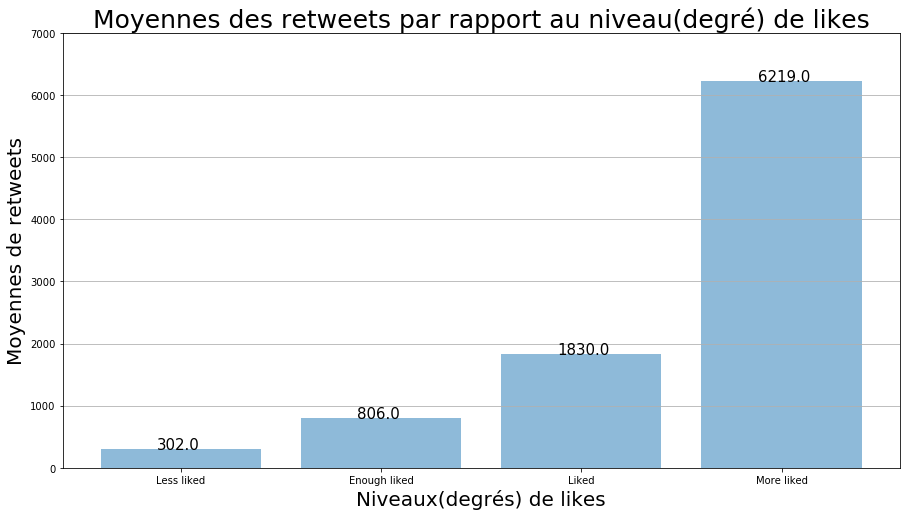

In [97]:
# Plot the bar
plt.figure(figsize=(15, 8))
plt.bar(favorite_level_mean.favorite_level, favorite_level_mean.retweet_count, alpha=0.5)
plt.title('Moyennes des retweets par rapport au niveau(degré) de likes', fontsize=25)
plt.grid(axis='y')
plt.ylim(0, 10)    # Define ranges of y axis
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000])    # Set ranges of y axis
plt.xlabel('Niveaux(degrés) de likes', fontsize=20)
plt.ylabel('Moyennes de retweets', fontsize=20);

# Set the value of each bar in its top level
for item in range(len(favorite_level_list)):
    plt.text(item-0.12, favorite_level_list[item], favorite_level_list[item], fontsize=15)
plt.savefig('retweets_per_like_level.png')

## Limitation
Tout au long de ce projet, nous avons fait face à beaucoup de difficultés qui peuvent aussi avoir une certaine influence sur les résultats de nos analyses, notamment:
1. Certains échecs constatés lors du téléchargement des certaines informations supplémentaires qui nous a conduit à supprimer certains tweets,
2. Certains tweets comportaient des valeurs inexactes que nous dû soit arranger, soit supprimer.


## Conclusion
Nous voici à la fin de ce projet qui a consisté à démontrer nos connaissances et compétences en matière de l'évaluation et du nettoyage des données.<br><br>
Lorsqu'on dit qu'en Analyse des données, plus de 80% du temps de réalisation est consommé par cette étape d'évaluation et d'analyse, nous l'avons vraiment expérimenté au travers de ce projet.<br><br>
Au point de devenir à un certain moment comme agaçant, ennuyant, mais avec l'amour du metier et le désir de dépasser ses limites nous donnent la force d'aller jusqu'au bout de sa réalisation.<br><br>
Expérience très enrichissante, nous avons appris beaucoup de concepts et développé d'autres compétences.

## Références
Nous avons y à consulter beaucoup de ressources pour réaliser ce projets :
* [stackoverflow](https://stackoverflow.com)
* [Tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)
* [Pandas documentation](https://pandas.pydata.org/docs/)
* [Twitter API Documentation](https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api)
* [How to get TWEETS by Python | Twitter API 2022](https://www.youtube.com/watch?v=Lu1nskBkPJU)